In [1]:
import pandas as pd
import sys
import os
import warnings
warnings.filterwarnings('ignore')
sys.path.append('../scripts')
from data_loader import *
from credit_score import *
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
# path to the CSV file
filename1 = 'featured_df.parquet'
#filename2 = 'final_credit_df.parquet'

path1 = os.path.join('..', 'data/featured', filename1)
#path2 = os.path.join('..', 'data/featured', filename2)

# Load dataset
featured_df = load_data(path1)
# credit_card_data = load_data(path2)

## Data

In [3]:
df = featured_df.sample(frac=1).reset_index(drop=True)

In [4]:
df

,Recency_binned_WoE,Frequency_binned_WoE,Monetary_binned_WoE,MeanAmount_binned_WoE,StdAmount_binned_WoE,AvgTransactionHour_binned_WoE,AvgTransactionDay_binned_WoE,AvgTransactionMonth_binned_WoE,is_high_risk
0,0.000000,0.403894,0.414863,-0.236934,0.115417,-0.444097,-0.410532,0.502589,1
1,0.000000,0.000000,0.000000,-0.109157,2.323540,0.927543,-0.257717,0.061430,1
2,-0.216590,-2.461131,-1.511833,-0.109157,-0.876021,-0.466906,-0.965636,0.061430,0
3,0.000000,0.000000,0.000000,-0.236934,0.166758,0.927543,-0.410532,0.502589,1
4,-0.216590,0.000000,0.000000,-0.509194,0.166758,-0.444097,1.233701,0.502589,1
...,...,...,...,...,...,...,...,...,...
3016,0.000000,0.403894,0.000000,-0.109157,0.115417,0.927543,-0.965636,0.061430,1
3017,-1.522281,0.403894,0.414863,-0.509194,-0.876021,-0.444097,1.186864,-0.256322,0
3018,0.000000,0.403894,0.000000,2.118931,-0.555657,-0.444097,-0.410532,-1.574754,1
3019,0.000000,0.403894,0.000000,2.118931,2.323540,-0.466906,-0.410532,3.608701,1


# Model 1:

### Model that assigns risk probability for a new customer

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

In [6]:
X = df.drop('is_high_risk', axis=1)
y = df['is_high_risk']

# Split the dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Training the logistic regression model

In [7]:
lr_model = LogisticRegression(C=1.0, penalty='l2', random_state=42)
lr_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

### Model Evalution

In [8]:
y_pred = lr_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')
print(f'ROC-AUC: {roc_auc:.2f}')

Accuracy: 0.93
Precision: 0.94
Recall: 0.96
F1-score: 0.95
ROC-AUC: 0.92


### Plot the ROC-AUC curve

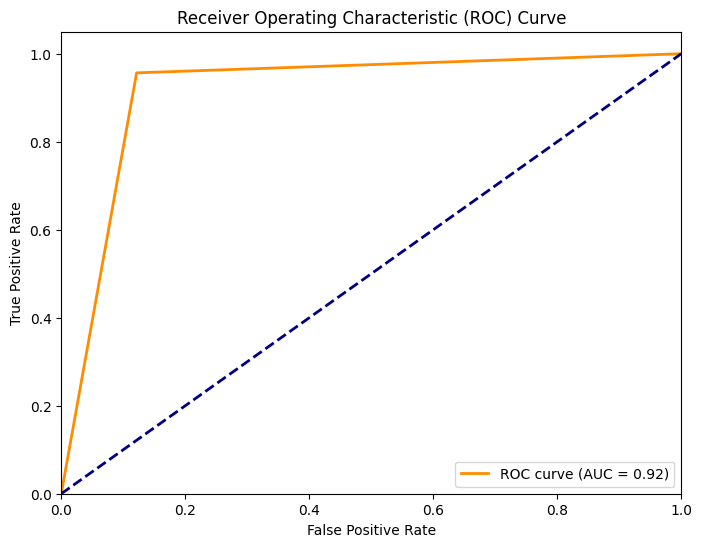

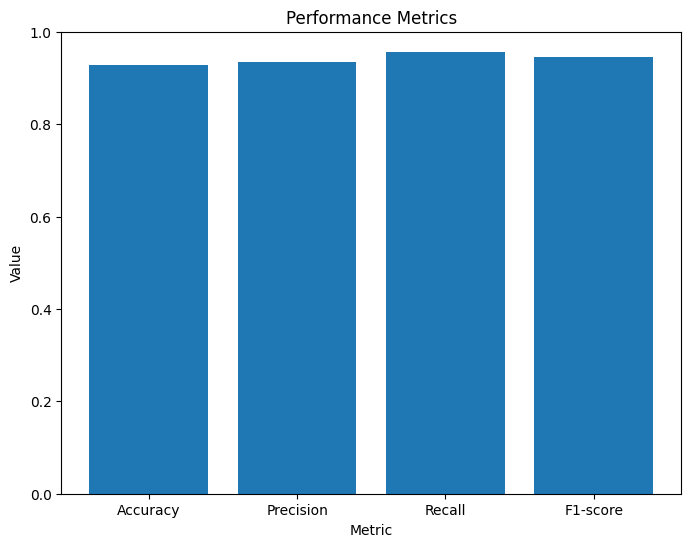

In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Plot other metrics
labels = ['Accuracy', 'Precision', 'Recall', 'F1-score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(8, 6))
plt.bar(labels, values)
plt.ylim([0, 1])
plt.title('Performance Metrics')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.show()

## Obtain risk probability for all users

In [10]:
df = featured_df.drop('is_high_risk', axis=1)

In [11]:
df['risk_probability'] = lr_model.predict_proba(df)[:, 1]

In [12]:
df['risk_probability']

2       0.951691
3       0.998038
4       0.888432
6       0.992666
9       0.999683
          ...   
3718    0.587596
3719    0.952326
3720    0.002566
3721    0.950019
3722    0.034624
Name: risk_probability, Length: 3021, dtype: float64

In [13]:
df

,Recency_binned_WoE,Frequency_binned_WoE,Monetary_binned_WoE,MeanAmount_binned_WoE,StdAmount_binned_WoE,AvgTransactionHour_binned_WoE,AvgTransactionDay_binned_WoE,AvgTransactionMonth_binned_WoE,risk_probability
2,0.000000,0.000000,0.000000,-0.509194,0.166758,0.709094,-0.965636,0.061430,0.951691
3,-0.216590,0.403894,0.000000,2.118931,2.323540,-0.371244,-0.965636,0.061430,0.998038
4,-0.653109,0.000000,0.000000,-0.236934,-0.876021,-0.371244,1.186864,-0.256322,0.888432
6,0.000000,0.403894,-1.511833,-0.320833,-0.876021,-0.444097,1.233701,3.608701,0.992666
9,0.000000,0.000000,0.000000,-0.320833,2.323540,-0.466906,1.186864,3.608701,0.999683
...,...,...,...,...,...,...,...,...,...
3718,-1.522281,0.000000,0.000000,-0.236934,-0.876021,-0.444097,1.186864,-0.256322,0.587596
3719,-0.216590,0.000000,0.000000,-0.509194,0.166758,-0.371244,-0.257717,0.502589,0.952326
3720,-1.522281,-2.461131,-1.836349,-0.320833,-0.555657,-0.371244,-0.257717,-1.574754,0.002566
3721,0.000000,-1.068884,-1.836349,-0.320833,-0.876021,-0.371244,1.186864,3.608701,0.950019


## Save Dataset

In [14]:
output_folder = os.path.join('..', 'data', 'model_input')
filename = 'risk_prob_df.parquet'

output_path = save_data(featured_df, output_folder, filename)

Dataset saved to ..\data\model_input\risk_prob_df.parquet


## Save the Model

In [15]:
import os
import joblib

model_dir = '../models'
model_path = os.path.join(model_dir, 'risk_prob_lr_model.pkl')

os.makedirs(model_dir, exist_ok=True)

try:
    joblib.dump(lr_model, model_path)
    print(f"Model saved to {model_path}")
except Exception as e:
    print(f"An error occurred while saving the model: {e}")

Model saved to ../models\risk_prob_lr_model.pkl


# Model 2

## Model that assigns credit score from risk probability estimates

### First Assign a Credit Score for all Users based on FICO credit score range & risk probability estimates
FICO credit score is a widely recognized and standardized credit scoring model used by lenders and financial institutions.

In [19]:
credit_score_df = assign_credit_score(df)
credit_score_df

,Recency_binned_WoE,Frequency_binned_WoE,Monetary_binned_WoE,MeanAmount_binned_WoE,StdAmount_binned_WoE,AvgTransactionHour_binned_WoE,AvgTransactionDay_binned_WoE,AvgTransactionMonth_binned_WoE,risk_probability,credit_score
2,0.000000,0.000000,0.000000,-0.509194,0.166758,0.709094,-0.965636,0.061430,0.951691,326.569706
3,-0.216590,0.403894,0.000000,2.118931,2.323540,-0.371244,-0.965636,0.061430,0.998038,301.079042
4,-0.653109,0.000000,0.000000,-0.236934,-0.876021,-0.371244,1.186864,-0.256322,0.888432,361.362210
6,0.000000,0.403894,-1.511833,-0.320833,-0.876021,-0.444097,1.233701,3.608701,0.992666,304.033863
9,0.000000,0.000000,0.000000,-0.320833,2.323540,-0.466906,1.186864,3.608701,0.999683,300.174429
...,...,...,...,...,...,...,...,...,...,...
3718,-1.522281,0.000000,0.000000,-0.236934,-0.876021,-0.444097,1.186864,-0.256322,0.587596,526.821955
3719,-0.216590,0.000000,0.000000,-0.509194,0.166758,-0.371244,-0.257717,0.502589,0.952326,326.220973
3720,-1.522281,-2.461131,-1.836349,-0.320833,-0.555657,-0.371244,-0.257717,-1.574754,0.002566,848.588687
3721,0.000000,-1.068884,-1.836349,-0.320833,-0.876021,-0.371244,1.186864,3.608701,0.950019,327.489307


In [39]:
credit_score_df.corr()

,Recency_binned_WoE,Frequency_binned_WoE,Monetary_binned_WoE,MeanAmount_binned_WoE,StdAmount_binned_WoE,AvgTransactionHour_binned_WoE,AvgTransactionDay_binned_WoE,AvgTransactionMonth_binned_WoE,risk_probability,credit_score
Recency_binned_WoE,1.000000,0.413483,0.307707,0.134189,0.178043,0.209209,0.220530,0.524062,0.669279,-0.669279
Frequency_binned_WoE,0.413483,1.000000,0.595880,0.145713,0.237274,0.279635,0.346502,0.318856,0.762385,-0.762385
Monetary_binned_WoE,0.307707,0.595880,1.000000,0.340426,0.392045,0.211220,0.301800,0.240589,0.750804,-0.750804
MeanAmount_binned_WoE,0.134189,0.145713,0.340426,1.000000,0.656588,0.074843,0.049271,0.067229,0.350672,-0.350672
StdAmount_binned_WoE,0.178043,0.237274,0.392045,0.656588,1.000000,0.139498,0.105139,0.110795,0.419818,-0.419818
AvgTransactionHour_binned_WoE,0.209209,0.279635,0.211220,0.074843,0.139498,1.000000,0.130655,0.146365,0.307125,-0.307125
AvgTransactionDay_binned_WoE,0.220530,0.346502,0.301800,0.049271,0.105139,0.130655,1.000000,0.203877,0.432523,-0.432523
AvgTransactionMonth_binned_WoE,0.524062,0.318856,0.240589,0.067229,0.110795,0.146365,0.203877,1.000000,0.527355,-0.527355
risk_probability,0.669279,0.762385,0.750804,0.350672,0.419818,0.307125,0.432523,0.527355,1.000000,-1.000000
credit_score,-0.669279,-0.762385,-0.750804,-0.350672,-0.419818,-0.307125,-0.432523,-0.527355,-1.000000,1.000000


## Random Forest Regressor Model
Model that assigns credit score from risk probability estimates

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [41]:
# Split the data 
X = credit_score_df.drop(['credit_score','risk_probability'], axis=1)
y = credit_score_df['credit_score']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=42)

### Model Training

In [42]:
credit_score_model = RandomForestRegressor(random_state=42)
credit_score_model.fit(X_train2, y_train2)

RandomForestRegressor(random_state=42)

### Predict credit scores on the test set

In [44]:
y_pred2 =credit_score_model.predict(X_test2)

In [45]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test2, y_pred2)
mse = mean_squared_error(y_test2, y_pred2)
rmse = mean_squared_error(y_test2, y_pred2, squared=False)
r2 = r2_score(y_test2, y_pred2)

print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Absolute Error: 8.42
Mean Squared Error: 396.30
Root Mean Squared Error: 19.91
R-squared: 0.99


In [46]:
y = pd.Series(y_pred2)
y

0      833.778232
1      336.288248
2      300.424755
3      526.274042
4      769.951436
          ...    
600    300.698058
601    300.412447
602    334.389336
603    301.332041
604    305.557421
Length: 605, dtype: float64

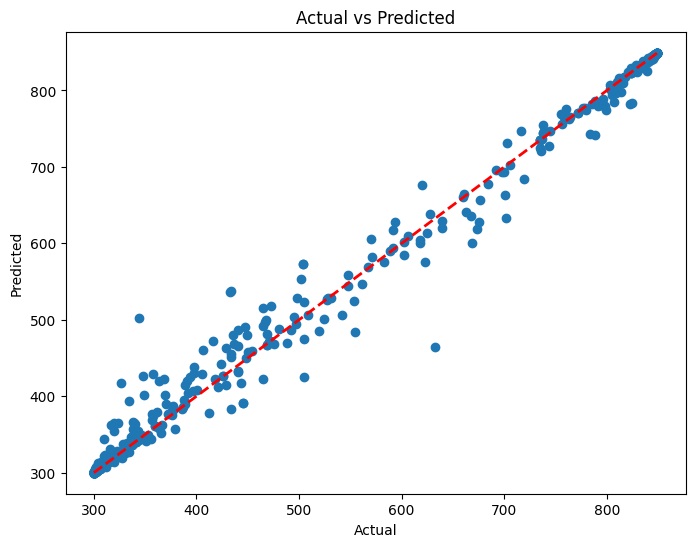

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test2, y_pred2)
plt.plot([y_test2.min(), y_test2.max()], [y_test2.min(), y_test2.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()